Naseer Ahmad Taraki   Batch 3

In [1]:
pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - -------------------------------------- 20.5/625.1 kB ? eta -:--:--
   - ------------------------------------- 30.7/625.1 kB 435.7 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/625.1 kB 326.8 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/625.1 kB 357.2 kB/s eta 0:00:02
   ------ ------------------------------- 102.4/625.1 kB 420.8 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/625.1 kB 423.5 kB/s eta 0:00:02
   ---------- --------------------------- 174.1/625.1 kB 498.0 kB/s eta 0:00:01
   ------------- ------------------------ 225.3/625.1 kB 528.4 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/625.1 kB 541.3 kB/s eta 0:00:01
   ----------------- -------------------- 286.7/625.1 kB 553.0 kB/s eta 0:00:01
   ------------------- ------------------ 317.4/625.1 kB 561.6 kB/s eta 0:00:01
   --------------------- ---------------- 348.2/625.1 kB 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pmdarima as pm  # For auto ARIMA


In [4]:
# Load the dataset
file_path = 'retail_sales_dataset.csv'
data = pd.read_csv(file_path)

In [5]:
# Convert the 'Date' column to datetime format and aggregate 'Total Amount' by 'Date'
data['Date'] = pd.to_datetime(data['Date'])
time_series_data = data.groupby('Date')['Total Amount'].sum()

In [6]:
# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]

In [7]:
# Automatically determine the best ARIMA parameters using pmdarima
auto_model = pm.auto_arima(
    train,
    seasonal=False,
    stepwise=True,
    suppress_warnings=True,
    trace=True,
    error_action="ignore",  # Ignore errors and keep searching
    max_p=5, max_d=2, max_q=5  # Search grid for ARIMA parameters
)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4928.975, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4839.978, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4876.573, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4813.196, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4797.508, Time=0.04 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4792.411, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4790.747, Time=0.13 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=4741.702, Time=0.23 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=4740.979, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=4739.390, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4737.414, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4735.4

In [8]:
# Extract the optimal parameters
best_order = auto_model.order
print(f"Optimal ARIMA order: {best_order}")

Optimal ARIMA order: (0, 0, 0)


In [9]:
# Fit ARIMA model using the optimal parameters
model = ARIMA(train, order=best_order)
model_fit = model.fit()

C:\Users\nasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [10]:
# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

C:\Users\nasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nasee\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 979.4271186509799
MAE: 781.9510945464878


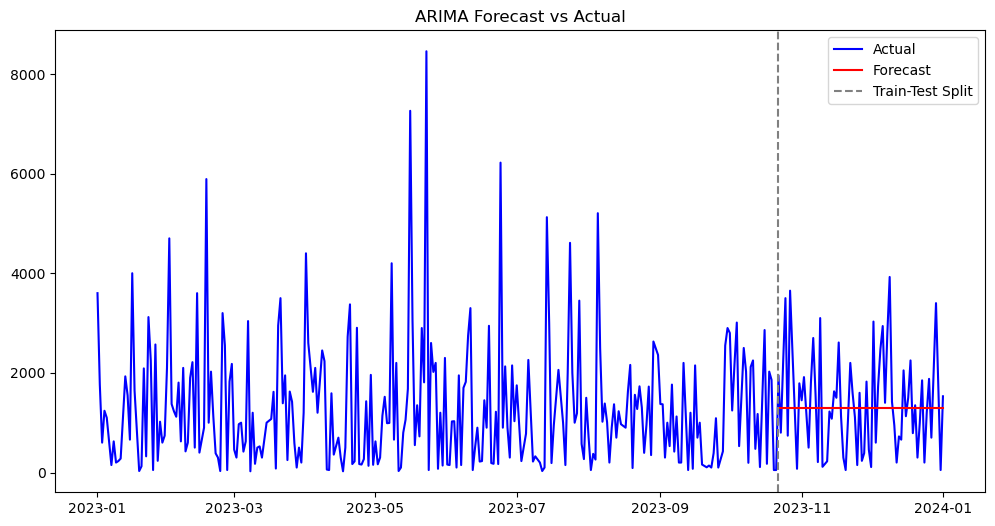

In [12]:
# Visualize actual vs forecasted data
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.axvline(x=test.index[0], color='gray', linestyle='--', label='Train-Test Split')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()
